In [1]:
#libreria y carga de datos

import pandas as pd
# metricas de evaluacion
from sklearn.metrics import mean_squared_error,median_absolute_error,r2_score

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('temps.csv')
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [2]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,348.0,2016.000000,0.000000,2016.0,2016.000,2016.0,2016.000,2016.0
month,348.0,6.477011,3.498380,1.0,3.000,6.0,10.000,12.0
day,348.0,15.514368,8.772982,1.0,8.000,15.0,23.000,31.0
temp_2,348.0,62.652299,12.165398,35.0,54.000,62.5,71.000,117.0
temp_1,348.0,62.701149,12.120542,35.0,54.000,62.5,71.000,117.0
average,348.0,59.760632,10.527306,45.1,49.975,58.2,69.025,77.4
actual,348.0,62.543103,11.794146,35.0,54.000,62.5,71.000,92.0
forecast_noaa,348.0,57.238506,10.605746,41.0,48.000,56.0,66.000,77.0
forecast_acc,348.0,62.373563,10.549381,46.0,53.000,61.0,72.000,82.0
forecast_under,348.0,59.772989,10.705256,44.0,50.000,58.0,69.000,79.0


In [3]:
df.isnull().sum()

year              0
month             0
day               0
week              0
temp_2            0
temp_1            0
average           0
actual            0
forecast_noaa     0
forecast_acc      0
forecast_under    0
friend            0
dtype: int64

Realice un análisis gráfico de las temperaturas máximas históricas, las
temperaturas de los dos días anteriores y la estimación del amigo, con
respecto a la fecha. Comente si hay anomalías.

In [4]:
ordered_by_average = df[['average', 'temp_2', 'temp_1', 'friend','year','month', 'day' ]].sort_values(by='average', ascending=False).head(5)
ordered_by_average.set_index(['year','month', 'day'],  inplace=True)
ordered_by_average.head()

average  temp_2  temp_1  friend
year month day                                 
2016 7     31      77.4      88      76      95
     8     1       77.4      76      73      65
           2       77.4      73      77      62
     7     28      77.3      79      83      76
           27      77.3      85      79      79

<Axes: xlabel='year,month,day'>

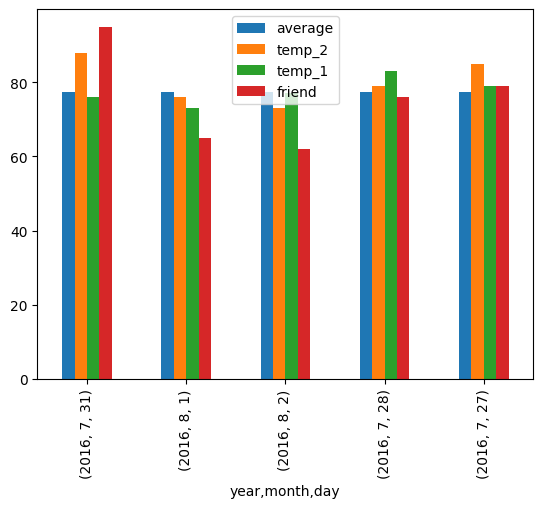

In [5]:
ordered_by_average.plot.bar()

El dia que se registro la mayor temperatura se pudo observar que el dia anterior hubo un incremento que pudo llevar al amigo a hacer una prediccion muy por encima.

Recodifique los días de la semana, creando siete variables 1-0 asociados
a los días de la semana. Le puede facilitar el proceso usando
get_dummies de la librería Pandas.

In [6]:
dummy_weeks_df = pd.get_dummies(df['week'], prefix='week', prefix_sep='_', dtype=int)
df_full = pd.concat([df, dummy_weeks_df], axis=1)
df_full.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0


Ahora, separe los datos en predictores y variable respuesta. Su variable
Y es la temperatura máxima real y los predictores son todas las

columnas que usa el modelo para hacer una predicción. Asegúrese de
transformar en una matriz Numpy porque esa es la forma en que
funciona el algoritmo.
5. Separe su base en entrenamiento y testeo en 75/25. Use una semilla
(random_state = 42) para obtener los mismos valores.
6. Cree una línea de base, es decir, el error que obtendremos si
simplemente predijéramos la temperatura máxima promedio para
todos los días.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df_full.drop(['actual', 'week'],axis=1), df_full['actual'],test_size= .25 ,random_state= 42 )

In [8]:
from sklearn.ensemble import RandomForestRegressor
RanForReg = RandomForestRegressor(random_state=0)
RanForReg.fit(X_train,y_train)

print("MSE:", mean_squared_error(y_test,RanForReg.predict(X_test)))
print("MAE:", median_absolute_error(y_test,RanForReg.predict(X_test)))
print("R2:", r2_score(y_test,RanForReg.predict(X_test)))

MSE: 26.428044827586206
MAE: 3.3800000000000026
R2: 0.8099642876007493


In [13]:
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=15,
                                       n_estimators=1000, oob_score=True)

classifier_rf.fit(X_train, y_train)

classifier_rf.oob_score_

0.08812260536398467

In [14]:
y_pred = classifier_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud:", accuracy)

Exactitud: 0.09195402298850575


Segun los valores obtenidos la exactitud es bastante baja para poder realizar alguna preduccion usando los datos de prueba